<a href="https://colab.research.google.com/github/ronald-hk-chung/ssnotebook/blob/main/basics_of_neural_network/classification_with_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with Neural Network

In a classification problems, we're trying to predict which class a data point belongs to.

*   **Binary classification** involves categorizing data into only two classes to predict, each instance belongs to either of them.

    Use Case Classifying an image of an animal into cat or dog category.
    
*   **Multiclass classification** involves categorizing data into mutually exclusive classes. Each data point belongs to one and only one class, making it suitable for scenarios where items can be distinctly assigned to one category.

    Use Case: Handwritten Digit Recognition: Assigning a digit (0–9) to a given handwritten image.

*   **Multi-label classification** deals with instances that can be associated with multiple labels simultaneously. This technique is ideal for tasks where data points may belong to more than one class at the same time.

    Use Case: Text Categorization: Labeling articles with multiple topics they cover.

In summary,

| Problem Type | Problem Description |
| ----- | ----- |
| Binary Classification | Target can be one of two options |
| Multi-class Classification | Target can be one of more than two options |
| Multi-label Classification | Target can be assigned more than one option |


# Binary Classification on Scikit-Learn `make-circle()` Dataset

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

`make-moon()` dataset make a large circle containing a smaller cicle in 2d

## Data Preperation for `make_moons`

In [1]:
# Create dataset with scikit-learn
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [2]:
# Turn data into a DataFrame
import pandas as pd
df = pd.DataFrame({"X1": X[:, 0],
                   'X2': X[:, 1],
                   'y': y})
df.head()

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [3]:
# Split data into train and valid sets
from sklearn.model_selection import train_test_split
df_train, df_valid = train_test_split(df, test_size=0.2)

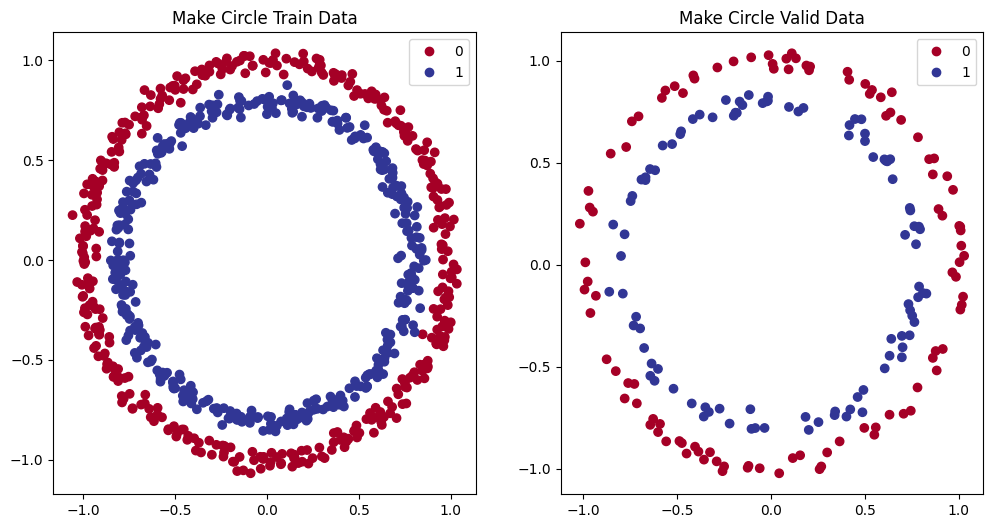

In [4]:
import matplotlib.pyplot as plt

# Visualize both train/valid dataset on a scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
scatter1 = ax1.scatter(df_train['X1'], df_train['X2'], c=df_train['y'], label=df_train['y'], cmap=plt.cm.RdYlBu)
ax1.legend(*scatter1.legend_elements())
ax1.set(title='Make Circle Train Data')

scatter2 = ax2.scatter(df_valid['X1'], df_valid['X2'], c=df_valid['y'], label=df_valid['y'], cmap=plt.cm.RdYlBu)
ax2.legend(*scatter2.legend_elements())
ax2.set(title='Make Circle Valid Data');

Using Dataset and DataLoader for both training and valid dataset

In [5]:
import torch
from torch.utils.data import Dataset

class CircleDS(Dataset):
    def __init__(self, df):
        self.df = df
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        X = torch.tensor(df[['X1','X2']].iloc[idx], dtype=torch.float)
        y = torch.tensor(df['y'].iloc[idx], dtype=torch.float)
        return X, y

train_ds = CircleDS(df_train)
valid_ds = CircleDS(df_valid)

In [6]:
from torch.utils.data import DataLoader

train_dl = DataLoader(dataset=train_ds,
                      batch_size=32,
                      shuffle=True,
                      drop_last=True)

valid_dl = DataLoader(dataset=valid_ds,
                      batch_size=32,
                      shuffle=False,
                      drop_last=True)

In [7]:
batch = next(iter(train_dl))
batch

[tensor([[ 0.7313,  0.3701],
         [ 0.6977, -0.4534],
         [-0.7711, -0.0511],
         [-0.4440,  0.6597],
         [ 0.6830,  0.4601],
         [ 0.1901,  0.7177],
         [ 0.9496,  0.0787],
         [-0.5190, -0.6073],
         [-0.4046,  0.8540],
         [-0.3488, -0.7149],
         [-0.9334, -0.3382],
         [-0.9760, -0.0823],
         [-0.5869,  0.7804],
         [ 0.7302,  0.0221],
         [ 0.1480, -0.9746],
         [ 0.7528, -0.2498],
         [-0.7485,  0.3978],
         [ 0.4790, -0.6074],
         [ 0.8924,  0.4926],
         [-0.7456, -0.1593],
         [ 0.5578, -0.5709],
         [-0.5119, -0.6079],
         [-0.5798, -0.5968],
         [-0.4166,  0.7161],
         [ 0.1489, -0.7755],
         [-0.8093, -0.5870],
         [-0.0846, -0.7537],
         [ 0.3283, -0.7336],
         [-0.1628, -1.0567],
         [ 0.6579, -0.4651],
         [-0.3972, -0.8924],
         [ 0.8139,  0.1144]]),
 tensor([1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1

## Logistic Regression

Given 2 features, X1 and X2, the model will fit a linear regression such that its outputs are logits (z) which are then converted into probabilities using a sigmoid function

$$
P(y=1) = \sigma(z) = \sigma(b + w_1x_1 + w_2x_2)
$$

<img src="https://github.com/ronald-hk-chung/ssnotebook/blob/main/basics_of_neural_network/assets/logistic_regression_2inputs.png?raw=true">

In [8]:
import torch
import torch.nn as nn

class SimpleLogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=2, out_features=1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, X):
        return self.sigmoid(self.linear(X)).squeeze()

model_0 = SimpleLogisticRegression()
print(model_0)

SimpleLogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [9]:
y_preds = model_0(batch[0])
y_preds, y_preds.shape

(tensor([0.2929, 0.2334, 0.4775, 0.4963, 0.3069, 0.4021, 0.2428, 0.3837, 0.5094,
         0.3486, 0.4747, 0.5070, 0.5311, 0.2651, 0.2599, 0.2418, 0.5187, 0.2477,
         0.2819, 0.4626, 0.2411, 0.3826, 0.3940, 0.4976, 0.2754, 0.4304, 0.3080,
         0.2563, 0.2930, 0.2371, 0.3395, 0.2619], grad_fn=<SqueezeBackward0>),
 torch.Size([32]))

Output of the model is an array of probabilities for each sample being class 1 with shape of 32 which is the batchsize selected in DataLoader

## Cross-Entropy as Loss Function in classification models

The concept of cross-entropy traces back into field of Information Theory

Reference: https://en.wikipedia.org/wiki/Cross-entropy

<br/>

**Entropy**

Entropy of a random variable X is the level of uncertainty inherent in the variables possible outcome. For a random variable $X$ with probability distribution $p(x)$, entropy is defined as below:

<br/>

$$
H(X)=-\sum_{x \in X} p(x) \log p(x)
$$

<br/>

Note that $\log(p(x))$ for all $p(x)$ in (0, 1).

With $p(x)$ being the probability distribution and value always range between 0 and 1.

The greater the value of entropy $H(X)$, the greater the uncertainty for probability distribution and the smaller the value the less the uncertainty

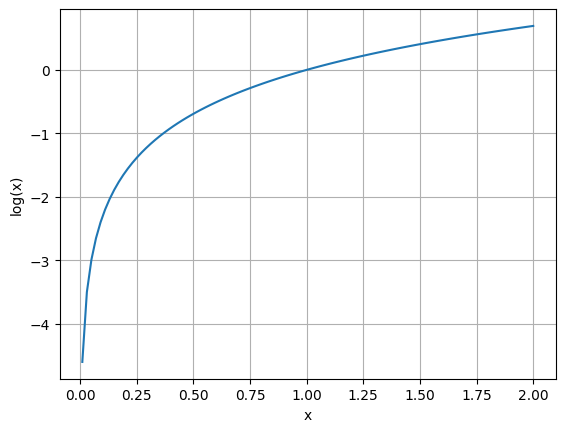

In [10]:
import numpy as np

x = np.linspace(0.01, 2, 100)

plt.plot(x, np.log(x))
plt.xlabel('x')
plt.ylabel('log(x)')
plt.grid();

We can then define the **Cross-Entropy Loss** as

<br/>

$$
L_{CE} = - \sum_{i=1}^n y_i \log(p_i)
$$

where $y_i$ is the truth label and $p_i$ is teh probability for the $i^{th}$ class

<br/>

Specifically for binary classification problem, since we only have 2 classes (0, 1), we can have $y_1=1$ and $y_2=0$ and since $p_1 = 1 - p_2$ and $y_2 = 1 - y_1$. We can summarise the loss as **binary cross-entropy (BCE) loss** as calculated as the average cross-entropy across the data samples, which can be stated as below:

<br/>

$$
L_{BCE} = -\frac{1}{N}\sum_{i=1}^N[y_i\log(P(y_i=1)) + (1-y_i)\log(1-P(y_i=1))]
$$

<br/>

Note that PyTorch has two binary cross entropy implimentation:

1. `nn.BCELoss()` - Creates a loss funciton that measures the binary cross entropy between the target (label) and input (features)

2. `nn.BCEWithLogitsLoss()` - is the same as above except it has a sigmoid layer `nn.Sigmoid()` built in

<br/>

**BCELoss**

Reference: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

BCE Loss requires the predicted probabilities, as returned by the **sigmoid** function, and the true labels ($y$). For each data point $i$ in the training set, it computes the errro as following:

For each data point $i$ in the training set,

1. If the data point belongs to the **positive class (y=1)**, we take the $\log$ of predicted probability that it is positive:

$$
y_i = 1 \implies error_i = \log(P(y_i=1))
$$

2. If the data point belows to the **negative class(y=0)**, we take the log of probability that is negative:

$$
y_i=0 \implies error_i = \log(1-P(y_i=1))
$$

Note that if data point belongs to positive, its prob should be close to 1, which would result in a zero loss from taking the $\log(1)$

<br/>

**BCEWithLogitsLoss**

BCEWithLogitsLoss takes logits as an argument instead of probabilities. It means that we should not add a `nn.Sigmoid()` as the last layer of our model when using `BCEWithLogitsLoss`. This loss combines both the `Sigmoid` layer and `BCELoss` into one function.

Note that we shoudl not be mixing `nn.Sigmoid` and `nn.BCEWithLogitsLoss` together. When we use `nn.BCEWithLogitsLoss`, we do not put `nn.Sigmoid` in the last layer.

For our binary classification exercise, we will use `BCELoss` which requires `nn.Sigmoid` as last layer.



In [11]:
loss_fn = nn.BCELoss(reduction='mean')
loss_fn

BCELoss()

In [13]:
loss_fn(y_preds, batch[1])

tensor(0.9210, grad_fn=<BinaryCrossEntropyBackward0>)

`loss_fn` returns the mean of Binary Cross-Entropy loss for each batch

## Defining a metric function

In Machine Learning, the efficiency of a model is not just about its ability to make predictions but also to make the right ones. Practioners use evaluation metrics to understand how well a model performs its intended task. The most important metrics for classification performance are namely **accuracy**, **precision** and **recall**

**Accuracy** is a metric that measures how often a machine learning model correctly predicts the outcome. You can calculate accuracy by dividing the number of correct predictions by the total number of predictions. While it is the most intuitive metrics, it may be insufficient in situations with imbalanced classes or different error costs. **Precision** and **Recall** address the gap. **Precision** measures how often predictions for a positive class are correct while **Recall** address how well the model fins all positive instances in the dataset.

To understand the differentiations of the metrics, we have to understand the **Confusion Matrix**.

\

**The Confusion Matrix**

The confusion matrix is a visual representation to access their model's accuracy in different areas. For binary classification problem, it can be represented as below:

<img src="https://github.com/ronald-hk-chung/ssnotebook/blob/main/basics_of_neural_network/assets/confusion_matrix.png?raw=true">


At its core, the confusion matrix is a table that compares the actual outcomes with the predicted outcomes of a classifcation model. It is pivotal in understanding the nuances of a model's perfmrance, especially in scenarios where class imabalnces exist or where the cost of different types of errors varies. Breakdown down the prediction into specific categories provides a granular view of a more informed decision-making process to optimize models.

**Elements of Confusion Matrix**

*   **True Positive (TP)** - instances where the model correctly predicted the positive class.
*   **True Negative (TN)** - instances where model accurately predicted the negative classes
*   **False Positive (FP)** - instances where model incorrectly predicted the positive class
*   **False Negative (FN)** - instances where model fails to identify the positive class, marking it as negative instead.

**Accuracy**

\

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Accuracy represents the ratio of correctly predicted instances to the total number of instances in teh dataset. It answers the question: "Out of all the prediction made, how many were correct?" Accuracy is often the first metric to consider when evaluating classification models.

\

**Precision**

\

$$
Precision = \frac{TP}{TP+FP}
$$

Precision is a pivotal metric especiall if there is a high cost of false positives. It provides insight into the model's ability to correctly predict positive instances while minimizing the risk of a false alarms. Precision is often referred to as the positive predictive value, quantifies the proportion of true positive predictions among all positive predictions made by the model. It answers the question: "Of all the instances predict as postiive, how may were positive?" Precision solely focuses on the correctly predicted positive cases, neglecting the false negatives. As a reslt, a model can achieve high precision by making very few positive predictions, potentially missing out on many actual positive cases.

\

**Recall**

\

$$
Recall = \frac{TP}{TP+FN}
$$

Recall also known as sensitivity or true positive rate, that emphasizes the model ability to identify all relevant instances. Recall measures the proportion of actual positive cases correctly identified by the model. It answers the question: "Of all the acutal positive instances, how many were correctly predicted by the model?". The recall metric is about finding all positive cases, even with more false positives. A model may predict most instances as postive to achieve a high recall.

\

**F1 Score**

As we have seen there is a trade-off between precisiona nd recall, F1 can therefore be used to measure how effectively our models make that trade-off.

$$
F1 = 2 \times \frac{precision \times recall}{precision+recall}
$$

One important feature of the F1 score is that the result is zero if any of the comonents (precision or recall) fall to zero. Thereby it penalizes extreme negative values of either component.

\

**To summarise:**

<img src="https://github.com/ronald-hk-chung/ssnotebook/blob/main/basics_of_neural_network/assets/confusion_matrix_metric_calculation.png?raw=true">

Since in our case, we are dealing with binary classification, our ideal outputs are 0 or 1. With last layer being `nn.Sigmoid`, we are outputing the prediction probabilities of how much the model thinks the datapoint belows to one class or another. We can use 0.5 as our decision boundary as follow:

*   if `y_preds` >= 0.5, y=1
*   if `y_preds` < 0.5, y=0

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def metric_fn(y_preds, y):
    # Turn into numpy to use sklearn.metrics
    y_preds = np.round(y_preds.detach().cpu().numpy())
    y = y.detach().cpu().numpy()

    # Calculate scores from using sklearn.metrics
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds, average='binary', zero_division=1)
    recall = recall_score(y, y_preds, average='binary', zero_division=1)
    f1 = f1_score(y, y_preds, average='binary', zero_division=1)

    # SSTLearner supports returning a dictionary from metric_fn
    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1}

In [15]:
metric_fn(y_preds, batch[1])

{'accuracy': 0.25,
 'precision': 0.25,
 'recall': 0.045454545454545456,
 'f1': 0.07692307692307693}

## Importing SSTLearner

In [16]:
# Installing sstorch package
!pip -q install git+https://github.com/ronald-hk-chung/sstorch.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 3.6 MB/s eta 0:00:00


## Training model_0 - Logistic Regression

In [17]:
from sstorch.learner import SSTLearner

model_0_learner = SSTLearner(model=model_0,
                             loss_fn=loss_fn,
                             metric_fn=metric_fn,
                             optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1),
                             train_dataloader=train_dl,
                             valid_dataloader=valid_dl)

In [18]:
model_0_learner.train(10)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | LR: 1.0E-01 | train_loss: 0.745 | valid_loss: 0.739 
train_metric: {'accuracy': 0.464, 'precision': 0.436, 'recall': 0.224, 'f1': 0.284}
valid_metric: {'accuracy': 0.469, 'precision': 0.479, 'recall': 0.261, 'f1': 0.338}
----------------------------------------------------------------------------------------------------
Epoch: 2 | LR: 1.0E-01 | train_loss: 0.718 | valid_loss: 0.717 
train_metric: {'accuracy': 0.472, 'precision': 0.459, 'recall': 0.296, 'f1': 0.352}
valid_metric: {'accuracy': 0.479, 'precision': 0.498, 'recall': 0.309, 'f1': 0.38}
----------------------------------------------------------------------------------------------------
Epoch: 3 | LR: 1.0E-01 | train_loss: 0.706 | valid_loss: 0.706 
train_metric: {'accuracy': 0.485, 'precision': 0.479, 'recall': 0.381, 'f1': 0.416}
valid_metric: {'accuracy': 0.469, 'precision': 0.485, 'recall': 0.331, 'f1': 0.392}
----------------------------------------------------------------------------------------------------
Ep

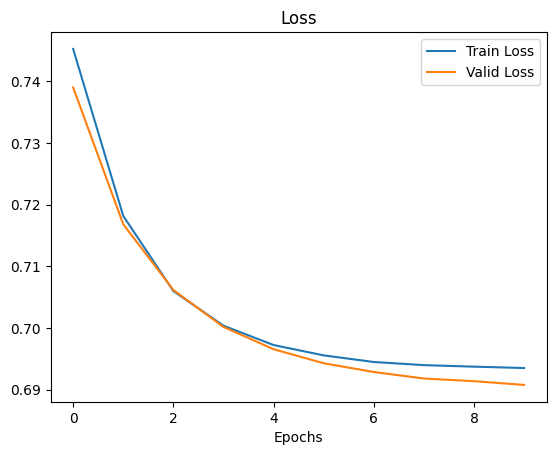

In [19]:
model_0_learner.plot_loss_curve()

As shown by the loss_curve, Logistic Regression (model_0) fail to learn on the non-linear classification problem on `make_circle()` dataset with accuracy only reaching ~50%


## Understanding Decision Boundary

We can create a decision boundry by fitting a model on the dataset, then using the model to make predictions for a grid of values across the input domain.

Reference: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

In [20]:
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

def plot_decision_boundary(model, X, y):
    # Move model and data to cpu
    model.to('cpu')
    # X, y = X.to('cpu'), y.to('cpu')

    # define a grid of points across the feature space
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    # define the x1 and x2 grid scale
    x1_grid = np.linspace(x1_min, x1_max, 101)
    x2_grid = np.linspace(x2_min, x2_max, 101)

    # define all the lines and rows of the grid
    x1, x2 = np.meshgrid(x1_grid, x2_grid)

    # create features by stacking X1, X2
    tensor_X = torch.tensor(np.column_stack((x1.flatten(), x2.flatten())), dtype=torch.float)

    # make prediction using tensor_X
    model.eval()
    with torch.inference_mode():
        y_logits = model(tensor_X)

    # calculate y_pred by rounding the logits and return as np
    y_preds = np.round(y_logits.detach().cpu().numpy()).reshape(x1.shape)

    plt.contourf(x1, x2, y_preds, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

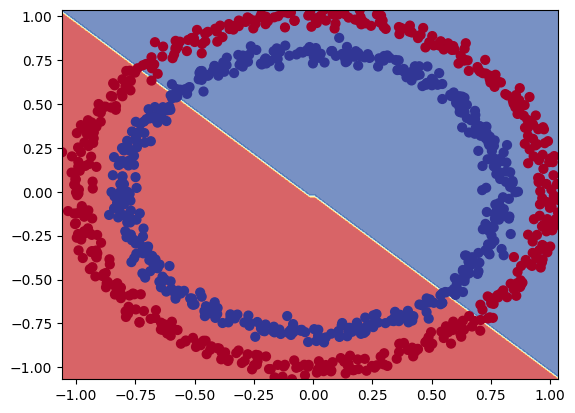

In [21]:
plot_decision_boundary(model_0_learner.model, X, y)

Check `state_dict()` for model output

In [22]:
model_0_learner.model.state_dict()

OrderedDict([('linear.weight', tensor([[0.0505, 0.0509]])),
             ('linear.bias', tensor([0.0015]))])

Note that for logistic regression with 2 features, the resulting decision boundary ( where $z=0$ and $\sigma(z)=0.5$ ) will result in a straight line.

$$
z = 0 - b + w_1x_1 + w_2x_2
$$

$$
x_2 = -\frac{b}{w_2} -\frac{w_1}{w_2}x_1
$$

## Multi-Layer NN - Adding non-linear dimension (features) to our model

We can add non-linear dimenionality (features) for our classification model by using Multi-Layer Neural Network.

Below shows the implimentation:



In [31]:
class MultiLayerNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features = 10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        y = self.relu(self.layer_1(X))
        y = self.relu(self.layer_2(y))
        y = self.layer_3(y)
        return self.sigmoid(y).squeeze()

model_1 = MultiLayerNN()
print(model_1)

MultiLayerNN(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [32]:
y_preds = model_1(batch[0])
y_preds, y_preds.shape

(tensor([0.4434, 0.4386, 0.4487, 0.4398, 0.4424, 0.4407, 0.4425, 0.4475, 0.4385,
         0.4457, 0.4495, 0.4487, 0.4382, 0.4448, 0.4369, 0.4416, 0.4426, 0.4389,
         0.4410, 0.4494, 0.4384, 0.4474, 0.4476, 0.4390, 0.4406, 0.4466, 0.4439,
         0.4388, 0.4386, 0.4390, 0.4419, 0.4440], grad_fn=<SqueezeBackward0>),
 torch.Size([32]))

## Training model_1 - Multi-Layer Neural Network

In [33]:
model_1_learner = SSTLearner(model=model_1,
                             loss_fn=loss_fn,
                             metric_fn=metric_fn,
                             optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1),
                             train_dataloader=train_dl,
                             valid_dataloader=valid_dl)

In [34]:
model_1_learner.train(50)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | LR: 1.0E-01 | train_loss: 0.695 | valid_loss: 0.695 
train_metric: {'accuracy': 0.499, 'precision': 1.0, 'recall': 0.0, 'f1': 0.0}
valid_metric: {'accuracy': 0.469, 'precision': 1.0, 'recall': 0.0, 'f1': 0.0}
----------------------------------------------------------------------------------------------------
Epoch: 2 | LR: 1.0E-01 | train_loss: 0.691 | valid_loss: 0.693 
train_metric: {'accuracy': 0.524, 'precision': 0.956, 'recall': 0.082, 'f1': 0.108}
valid_metric: {'accuracy': 0.469, 'precision': 1.0, 'recall': 0.0, 'f1': 0.0}
----------------------------------------------------------------------------------------------------
Epoch: 3 | LR: 1.0E-01 | train_loss: 0.69 | valid_loss: 0.691 
train_metric: {'accuracy': 0.511, 'precision': 0.888, 'recall': 0.061, 'f1': 0.083}
valid_metric: {'accuracy': 0.594, 'precision': 0.63, 'recall': 0.521, 'f1': 0.569}
----------------------------------------------------------------------------------------------------
Epoch: 4 | LR: 1.0E-0

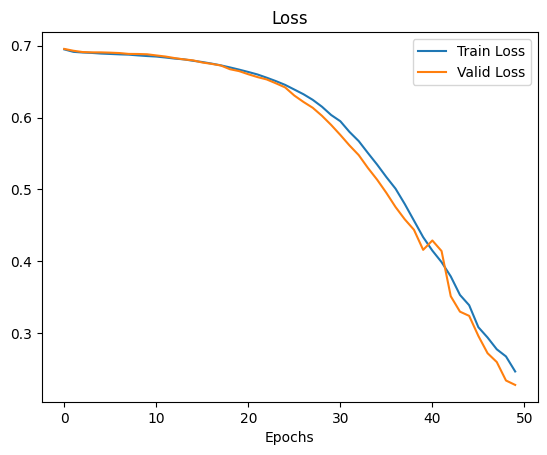

In [35]:
model_1_learner.plot_loss_curve()

## Decision Boundary for Multi-Layer Neural Network with ReLU activation function

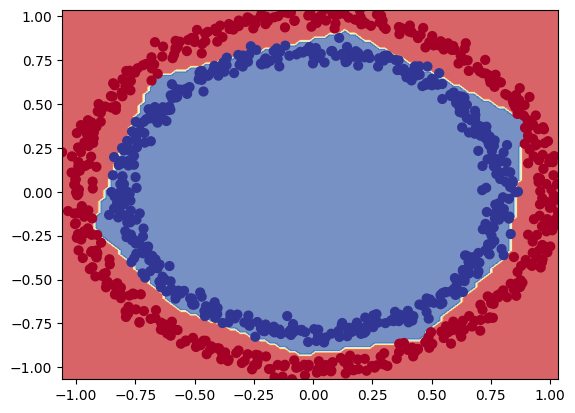

In [36]:
plot_decision_boundary(model_1_learner.model, X, y)

Note that the Multi-Layer Neural Network with ReLU activation function is able to classified the circle dataset with >95% accuracy. The reason for the model to be able to differentiate the classes that are not seperable linearly is by adding linear hyperplane. Neural network with added hidden layer with more units than the number of features increases the dimensionality (features)

## A Note on Adding Dimenionality and Kernel SVM

The basic idea behind kernel methods for dealing with linearly insperable data is to create nonlinear combination of the original features to project them onto a high-dimensional space via a mapping funcition $\phi$, where the data becomes linearly seperable.

For example, we can transform the 2-dimenional dataset into a new 3 dimensional feature space, where the classes become seperable via the following projection.

$$
\phi(x_1, x_2) = (x_1, x_2, z) = (x_1, x_2, x_1^2 + x_2^2)
$$





In [37]:
df['Z'] = df['X1']**2 + df['X2']**2

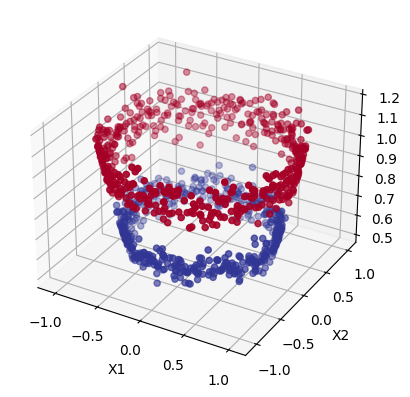

In [38]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['X1'], df['X2'], df['Z'], c=df['y'], label=df['y'], cmap=plt.cm.RdYlBu)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z');

The general idea is: As the number of dimenions increases, there is more and more emty space. If the data points are farther apart, it is likely easier to seperate them. In 2 dimenions, the decision boundary is a line. In 3 dimensions, it is a place. In 4 dimensions and more, it is a hyper-plane.

Kernel is a function that we use to create additional dimenions. The square function we used above is a polynomail kernel.

It turns out that universal approximation theorem enable multi-layer neural network with hidden layers able to approximate a continous kernel (or dimensions).

If the decision boundary of a classification problem can be defined as a continuous function, then it can also be defined as a continuous mapping of the feature space. This, in turn, means that the universal approximation theorem guarantees that it can be approximated by a NN. If the decision boundary isn’t continuous in the original feature space, the addition of further layers in the NN can increase its dimensionality, up to a point in which it is. A deep neural network can, therefore, approximate all decision boundaries comprised of multiple continuous regions.

So a Neural networks increases dimenionality if we add a hidden layer with more units than the number of features. Above model increases dimensionality from 2 dimensions (2 features x1, x2) to 10 dimenions (output features to hidden layer) and we use those 10 dimenions to compute logits. Not that this will only work if a non-linear activation like `ReLU` is between the layers


# Multiclass classification on Scikit-Learn make_blobs() dataset

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

make_blobs generate isotropic Gaussian blobs for clustering

## Data Preparation for `make_blobs`

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  random_state=42)

In [2]:
# Turn data into a DataFrame
import pandas as pd
df = pd.DataFrame({"X1": X[:, 0],
                   'X2': X[:, 1],
                   'y': y})
df.head()

,X1,X2,y
0,-8.413396,6.935165,3
1,-5.766484,-6.431171,2
2,-6.042137,-6.766102,2
3,3.950837,0.698403,1
4,4.250492,-0.281545,1


In [3]:
# Split data into train and valid sets
from sklearn.model_selection import train_test_split
df_train, df_valid = train_test_split(df, test_size=0.2)

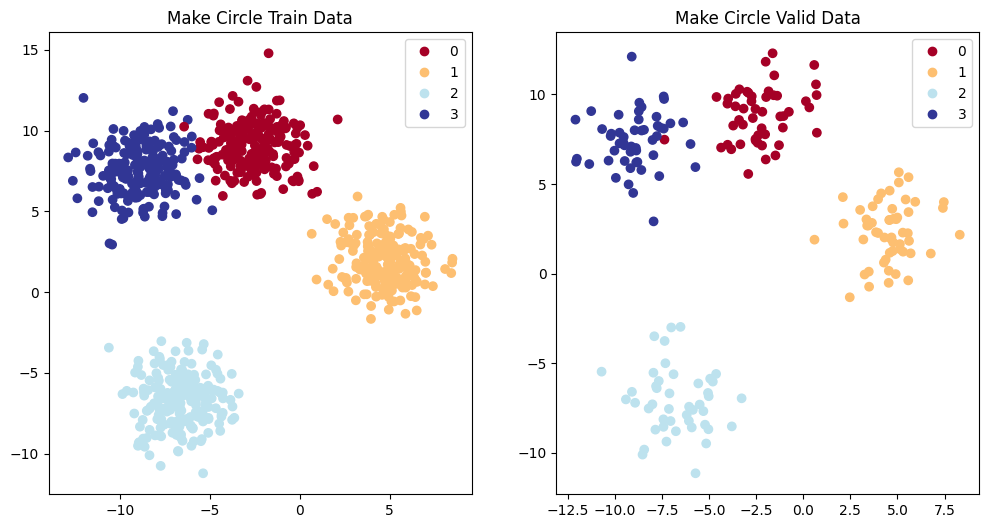

In [4]:
import matplotlib.pyplot as plt

# Visualize both train/valid dataset on a scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
scatter1 = ax1.scatter(df_train['X1'], df_train['X2'], c=df_train['y'], label=df_train['y'], cmap=plt.cm.RdYlBu)
ax1.legend(*scatter1.legend_elements())
ax1.set(title='Make Circle Train Data')

scatter2 = ax2.scatter(df_valid['X1'], df_valid['X2'], c=df_valid['y'], label=df_valid['y'], cmap=plt.cm.RdYlBu)
ax2.legend(*scatter2.legend_elements())
ax2.set(title='Make Circle Valid Data');

Preparing Dataset and DataLoader for Blob

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader

class BlobDS(Dataset):
    def __init__(self, df):
        self.df = df
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        X = torch.tensor(df[['X1','X2']].iloc[idx], dtype=torch.float)
        y = torch.tensor(df['y'].iloc[idx], dtype=torch.long)
        return X, y

train_ds = BlobDS(df_train)
valid_ds = BlobDS(df_valid)

train_dl = DataLoader(dataset=train_ds,
                      batch_size=32,
                      shuffle=True,
                      drop_last=True)

valid_dl = DataLoader(dataset=valid_ds,
                      batch_size=32,
                      shuffle=False,
                      drop_last=True)

In [7]:
batch = next(iter(train_dl))
batch

[tensor([[ -6.6081,  -8.8254],
         [ -8.6684,   5.1661],
         [-11.2101,   8.6661],
         [  3.5492,   1.6019],
         [ -4.5015,   9.3096],
         [ -8.3536,   7.1021],
         [ -9.6614,   7.4628],
         [ -2.5276,   7.6684],
         [ -8.6488,  10.2319],
         [ -8.4134,   6.9352],
         [  4.5282,   2.9042],
         [-10.2294,   7.6811],
         [ -9.8194,   4.5776],
         [  3.6994,   4.6918],
         [ -7.3755,   8.0752],
         [  1.8337,   1.4459],
         [  3.9702,   2.2643],
         [  0.9628,   6.2134],
         [ -8.7454,  -7.9195],
         [ -7.7937,   8.7565],
         [ -7.3911,   9.7469],
         [  3.1337,   0.8215],
         [ -9.0445,   8.7528],
         [ -5.5010,  -7.3155],
         [  4.3745,   0.7757],
         [ -2.1417,   8.2539],
         [ -4.5665,  -3.8710],
         [  6.2503,   0.4334],
         [  0.7206,   7.8633],
         [ -7.3711,   7.4777],
         [ -8.2727,   7.2796],
         [  5.8934,   0.2786]]),
 tenso

## Defining a multi-layer NN with linear layer stacks linear for our multi-class classification

We can use `nn.Sequential` to easily define stacks of linear layer with input, hidden and output layers

In [8]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=10):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, X):
        return self.linear_layer_stack(X)

model_2 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=10)
print(model_2)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=4, bias=True)
  )
)


In [9]:
y_logits = model_2(batch[0])
y_logits

tensor([[-3.0193,  0.4557,  1.8275, -0.0944],
        [-1.6060, -1.8499,  0.0912, -0.8258],
        [-1.8008, -2.5773, -0.0282, -1.0112],
        [ 1.1984, -0.3929, -1.2840, -0.6253],
        [ 0.1054, -2.1774, -1.1655, -1.0366],
        [-1.2480, -2.1243, -0.2423, -0.9263],
        [-1.5512, -2.2771, -0.0920, -0.9467],
        [ 0.4084, -1.7781, -1.2311, -0.9487],
        [-0.8870, -2.6277, -0.6564, -1.0897],
        [-1.2878, -2.1031, -0.2085, -0.9177],
        [ 1.6468, -0.5205, -1.6276, -0.6920],
        [-1.6741, -2.3529, -0.0358, -0.9587],
        [-2.0004, -1.8450,  0.3566, -0.7965],
        [ 1.6744, -0.8571, -1.7615, -0.7861],
        [-0.8463, -2.2013, -0.5373, -0.9758],
        [ 0.7122, -0.4965, -0.9944, -0.6193],
        [ 1.4057, -0.4635, -1.4468, -0.6593],
        [ 1.1481, -1.2947, -1.5598, -0.8687],
        [-3.4701,  0.1574,  2.0265, -0.1442],
        [-0.8635, -2.3372, -0.5725, -1.0118],
        [-0.6150, -2.4596, -0.7806, -1.0629],
        [ 0.9761, -0.3038, -1.1047

Output of the model should be a an array of logits with 4 elements dfined as output_features

## Using `Softmax` activation function to translate logits to probabilites

While in a **binary classification**, the logit output represented the log odds ratio for defining the probability of a positive class. `Sigmoid function` was sufficient to map logits into probabilities

In a **multiclass classification**, we need to get log odds ratios for every possible class.

**Softmax** is an activation function that scales numbers/logits into probabiities for multi-class classification model. The softmax function turns a vector of $K$ real values into a vector of $K$ real values that sum to 1. The input values can be any value, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. If the input is small or negative, the softmax turns it into a small probabilities and vice-versa, but it will always remained between 0 and 1.

Softmax is a generalization of logistic regression that can be used for multi-class classification, and its formula is very similar to the sigmoid function which is used for logistic regression. The softmax function can be used in a classifier only when the classes are **mutually exclusive**.

Many multi-layer neural networks end in a penultimate layer which outputs real-valued scores that are not conveniently scaled and which may be difficult to work with. Here the softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

Mathematically, it is represented as below:

<br/>

$$
\sigma(\vec{z})=\frac{e^{z_i}}{\sum_{j=1}^Ke^{z_j}}
$$

<br/>

where $\vec{z}$ is a vector of $K$ elements $\vec{z}=\left[z_0, z_1, \ldots, z_K\right]$


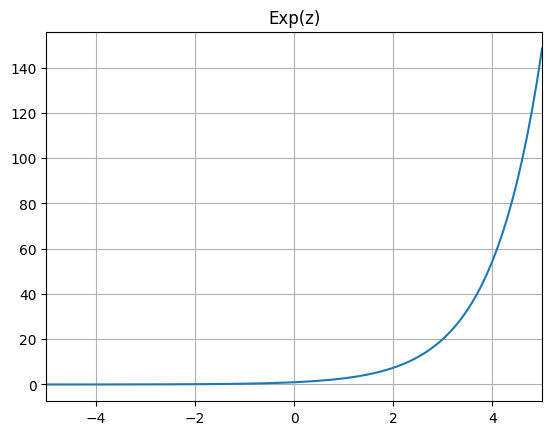

In [11]:
import numpy as np

z = np.linspace(-5, 5, 100)
plt.plot(z, np.exp(z))
plt.grid();
plt.xlim(-5, 5)
plt.title("Exp(z)");

With using the expoential function above:

**The Numerator**

Softmax applies expoential function each element of the vector returning the highest output value for the higest input value. Any negatives also become positive since its range (0, $\infty$)

**The Denominator**

The summation in teh denominator normalizes each element by ensuring the function will sum to 1 and create a probability distribution.

<br/>

Softmax function is implimented in Pytorch as `nn.Softmax`

In [12]:
logits = torch.rand(4)
print(logits)
softmaxed = nn.functional.softmax(logits, dim=-1)
print(softmaxed)

tensor([0.1085, 0.2181, 0.8530, 0.3209])
tensor([0.1832, 0.2044, 0.3858, 0.2266])


## Negative Log-Likelihood Loss

With probabilities returned by `softmax function`, we can use the the logsoftmax (`F.log_softmax()` or `nn.LogSoftmax()`) which returns log probabilities to computethe negative log-likelihood loss, or `nn.NLLLoss()`.

To understand the calculation, we extend from the binary cross-entropy loss

<br/>

$$
L_{BCE} = -\frac{1}{N}\sum_{i=1}^N[y_i\log(P(y_i=1)) + (1-y_i)\log(1-P(y_i=1))]
$$

<br/>

$$
L_{BCE} = -\frac{1}{N_{pos} + N_{neg}}[\sum_{i=1}^{N_{pos}}\log(P(y_i=1)) + \sum_{i=1}^{N_{neg}}\log(1-P(y_i=1)]
$$

to handle multiple classes.

For a total of $C$ classes, the **NLLLoss** is defined as below:

<br/>

$$
NLLLoss(y) = -\frac{1}{(N_0 + \dots + N_{C-1})}\sum_{c=0}^{C-1}\sum_{i=1}^{N_C}\log(P(y_i=c))
$$

<br/>

NLLLoss esentially lookup the inputs corresponding to the true class and add them up.


In [13]:
# Calculate the log probabilities of logits
log_probs = nn.functional.log_softmax(logits, dim=-1)
log_probs

tensor([-1.6971, -1.5874, -0.9525, -1.4847])

In [14]:
# Assume label is 2
label = torch.tensor([2])
nn.functional.nll_loss(log_probs.view(-1, 4), label)

tensor(0.9525)

`NLLLoss` returns the negative log probabilities of the true class

## Cross-Entropy-Loss with Softmax

While the `NLLLoss()` took log probabilites as an argument, `nn.CrossEntropyLoss()` takes Logits as an input like `nn.BCEWithLogitsLoss()`

As mentioned before, **Cross-Entropy-Loss** is defined as

$$
L_{CE} = - \sum_{i=1}^n y_i \log(p_i)
$$

where $y_i$ is the truth label, it can take 2 values 1 or 0

$p_i$ is the probability for the $i^{th}$ class

<br/>

Note that we do not need to use the `nn.Softmax()` layer for PyTorch implimentation `nn.CrossEntropyLoss()`. This is because PyTorch internally computes softmax by a simplified equation that is computationally efficient.

Given the classes are mutually exclusive, there is only one $y_c$ that is 1 for hte true class and rest are 0

$$
L_{CE} = -\log P_C
$$

where $P_C$ is the probability output of the neuron whose label is 1

$P_C$ is obtained by applying softmax function.

$$
\sigma(x_i) = \frac{e^{x_i}}{\sum_{c=1}^N e^{x_C}}
$$

$$
L_{CE} = -\log \frac{e^{x_i}}{\sum_{c=1}^N e^{x_C}}
$$


$$
L_{CE} = -x_i + \log \sum_{c=1}^Ne^{x_C}
$$

which results in the PyTorch CrossEntropyLoss equation and it already combines the **CrossEntropyLoss* and *Softmax** in one equation which is simple in terms of computation.

Below table summarises both binary and multiclas loss function that can be used in PyTorch

|   | BCELoss | BE With Logits Loss | NLL Loss | Cross-Entropy Loss |
| --- | --- | --- | --- | --- |
| Classification | binary | binary | multiclass | multiclass |
| input (each data point) | probability | logit | array of log probabilities | array of logits |
| Label (each data point) | float (0.0 or 1.0) | float (0.0 or 1.0) | long (class index) | long (class index) |
| Model's last layer | Sigmoid | - | LogSoftmax | - |

Same as `BCEWithLogitLoss` vs `BCELoss`, it is important to note:

1. if `nn.LogSoftmax` is the last layer, it means model is producing log probabilities. `nn.NLLLoss()` is the loss function to produce Cross-Entropy Loss

2. If no `nn.LogSoftmax` in the last layer, it means model is producign logits. `nn.CrossEntropyLoss()` is the loss function to produce Cross-Entropy Loss

For our Blob model, we will use `nn.CrossEntropyLoss` as our loss function

In [15]:
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [16]:
loss_fn(y_logits, batch[1])

tensor(1.3078, grad_fn=<NllLossBackward0>)

In [17]:
# Quick comparison to NllLoss on Log Probabilities
nn.NLLLoss()(nn.functional.log_softmax(y_logits, dim=-1), batch[1])

tensor(1.3078, grad_fn=<NllLossBackward0>)

## Define a metric function for the Multi-Class Classification problem

**From logits to predictions**

Since raw outputs of our model are logits, we need to use `softmax()` to convert to probabilities, and to make predictions, we can use`argmax()` the index of the array with highest value

In [18]:
y_probs = nn.functional.softmax(y_logits, dim=-1)
y_probs

tensor([[0.0056, 0.1802, 0.7103, 0.1039],
        [0.1061, 0.0831, 0.5792, 0.2315],
        [0.1047, 0.0482, 0.6164, 0.2307],
        [0.6903, 0.1406, 0.0577, 0.1114],
        [0.5876, 0.0599, 0.1649, 0.1876],
        [0.1808, 0.0753, 0.4944, 0.2495],
        [0.1313, 0.0635, 0.5649, 0.2403],
        [0.6395, 0.0718, 0.1241, 0.1646],
        [0.3076, 0.0539, 0.3873, 0.2511],
        [0.1714, 0.0759, 0.5045, 0.2482],
        [0.8008, 0.0917, 0.0303, 0.0772],
        [0.1150, 0.0583, 0.5916, 0.2351],
        [0.0623, 0.0727, 0.6575, 0.2075],
        [0.8353, 0.0664, 0.0269, 0.0713],
        [0.2858, 0.0737, 0.3893, 0.2511],
        [0.5733, 0.1712, 0.1041, 0.1514],
        [0.7470, 0.1152, 0.0431, 0.0947],
        [0.7772, 0.0676, 0.0518, 0.1034],
        [0.0032, 0.1212, 0.7859, 0.0897],
        [0.2916, 0.0668, 0.3901, 0.2514],
        [0.3782, 0.0598, 0.3204, 0.2416],
        [0.6200, 0.1724, 0.0774, 0.1301],
        [0.2091, 0.0613, 0.4770, 0.2526],
        [0.0126, 0.2097, 0.6476, 0

In [19]:
torch.argmax(y_probs, dim=-1)

tensor([2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2,
        0, 0, 2, 0, 0, 2, 2, 0])

Note that checking the argmax of the logits are the same as probabilities

In [20]:
torch.argmax(y_logits, dim=-1)

tensor([2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2,
        0, 0, 2, 0, 0, 2, 2, 0])

In [21]:
torch.argmax(y_logits, dim=-1).numpy()

array([2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 0, 0, 2, 2, 0])

**Micro and Macro Averaging**

For multi-class classification problem, it is important to understand micro-averaging and macro-averaging methods for evaluating scoring metrics (precision, recall, f1-score), especially when there are class imbalances when some classes are more common than others.

Micro average is concerned with the study of individual classes. It is calculated by taking the total number of true positive (TP), false positive(FP), true negatives(TN) and false negatives(FN) and then using these counts to calculate the precision, recall and F1-score. Micro average gives more weight to the majority class and is particularly useful when the classes are imbalances. The formular for calculating micro average is as follows:

$$
{Precision}_{micro}=\frac{\sum_{t=1}^n {TP}_i}{\sum_{i=1}^n ({TP}_i + {FP}_i)}
$$

$$
{Recall}_{micro}=\frac{\sum_{t=1}^n {TP}_i}{\sum_{i=1}^n ({TP}_i + {FN}_i)}
$$

$$
{F1score}_{micro}=2 \times \frac{{Precision}_{micro} * {Recall}_{micro}}{{Precision}_{micro} + {Recall}_{micro}}
$$

<br/>

Macro average is concerned with aggregations or totals. it calculates the performance of each class individually and then takes the unwweighted mean of the class-wise performance. Macro average gives equal weight to each class and is useful wehn all classes are of equal importance. The formula for calculating macro average is as follows:

$$
{Precision}_{macro}=\frac{1}{n}\sum_{t=1}^n \frac{{TP}_i}{{TP}_i + {FP}_i}
$$

$$
{Recall}_{macro}=\frac{1}{n}\sum_{t=1}^n \frac{{TP}_i}{{TP}_i + {FN}_i}
$$

$$
{F1score}_{macro}=2 \times \frac{{Precision}_{macro} * {Recall}_{macro}}{{Precision}_{macro} + {Recall}_{macro}}
$$

The main differene between macro and micro averaging is that macro averaging gives equal weight to each class while micro average gives equal weight to each sample. If we have the same number of samples for each class, both macro and micro will provide the same score.

**Micro averages** are useful when classes are imbalanced and it is important to have a better understanding of the model's performance on the majority class

**Macro averages** are useful when all classes are of equal importance and you want to have a better understanding of the model's performance on each class individually





For the blob problem, we will use macro averages

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metric_fn(y_logits, y):
    # Make prediction using argmax and turn into numpy array
    y_preds = torch.argmax(y_logits, dim=-1).detach().cpu().numpy()
    y = y.detach().cpu().numpy()

    # Calculate scores from using sklearn.metrics
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds, average='macro', zero_division=1)
    recall = recall_score(y, y_preds, average='macro', zero_division=1)
    f1 = f1_score(y, y_preds, average='macro', zero_division=1)

    # SSTLearner supports returning a dictionary from metric_fn
    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1}

In [23]:
metric_fn(y_logits, batch[1])

{'accuracy': 0.28125,
 'precision': 0.642156862745098,
 'recall': 0.45833333333333337,
 'f1': 0.21428571428571427}

## Train model_2 - Linear Stacks for Multi-classification on `make_blob`

In [25]:
# Installing sstorch package
!pip -q install git+https://github.com/ronald-hk-chung/sstorch.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 19.5 MB/s eta 0:00:00


In [27]:
from sstorch.learner import SSTLearner

model_2_learner = SSTLearner(model=model_2,
                             loss_fn=loss_fn,
                             metric_fn=metric_fn,
                             optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.1),
                             train_dataloader=train_dl,
                             valid_dataloader=valid_dl)

In [30]:
model_2_learner.train(5)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 31 | LR: 1.0E-01 | train_loss: 0.031 | valid_loss: 0.018 
train_metric: {'accuracy': 0.991, 'precision': 0.987, 'recall': 0.992, 'f1': 0.988}
valid_metric: {'accuracy': 0.995, 'precision': 0.996, 'recall': 0.994, 'f1': 0.995}
----------------------------------------------------------------------------------------------------
Epoch: 32 | LR: 1.0E-01 | train_loss: 0.027 | valid_loss: 0.01 
train_metric: {'accuracy': 0.99, 'precision': 0.99, 'recall': 0.992, 'f1': 0.99}
valid_metric: {'accuracy': 0.995, 'precision': 0.996, 'recall': 0.994, 'f1': 0.995}
----------------------------------------------------------------------------------------------------
Epoch: 33 | LR: 1.0E-01 | train_loss: 0.027 | valid_loss: 0.015 
train_metric: {'accuracy': 0.99, 'precision': 0.991, 'recall': 0.99, 'f1': 0.99}
valid_metric: {'accuracy': 0.995, 'precision': 0.996, 'recall': 0.992, 'f1': 0.993}
----------------------------------------------------------------------------------------------------
Epoch

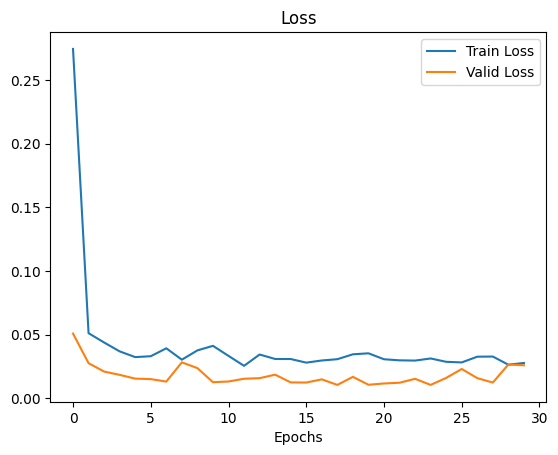

In [29]:
model_2_learner.plot_loss_curve()

## Visualise our decision boundary

We will need to modify our decision boundary function to incoporate multi-class classification

In [116]:
def plot_decision_boundary(model, X, y):
    # Move model and data to cpu
    model.to('cpu')
    # X, y = X.to('cpu'), y.to('cpu')

    # define a grid of points across the feature space
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    # define the x1 and x2 grid scale
    x1_grid = np.linspace(x1_min, x1_max, 101)
    x2_grid = np.linspace(x2_min, x2_max, 101)

    # define all the lines and rows of the grid
    x1, x2 = np.meshgrid(x1_grid, x2_grid)

    # create features by stacking X1, X2
    tensor_X = torch.tensor(np.column_stack((x1.flatten(), x2.flatten())), dtype=torch.float)

    # make prediction using tensor_X
    model.eval()
    with torch.inference_mode():
        y_logits = model(tensor_X)

    # calculate y_pred using argmax to logits
    y_preds = torch.softmax(y_logits, dim=-1).argmax(dim=-1)

    # Reshape preds and plots
    y_preds = y_preds.reshape(x1.shape)
    plt.contourf(x1, x2, y_preds, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)

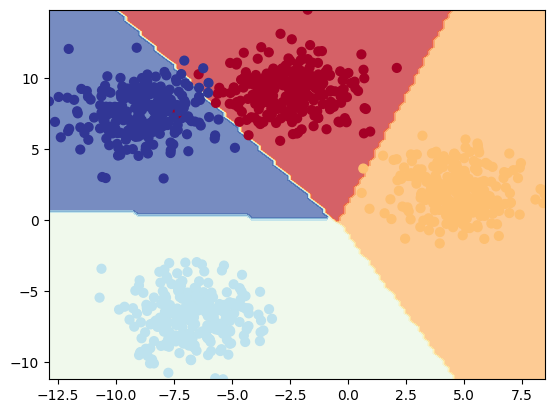

In [36]:
plot_decision_boundary(model_2_learner.model, X, y)

Our model manage to classified the `make_blob` dataset with 99% accruacy.

Note that this is possible because data are **linearly seperable**

Below we will try to use the same methodology for a **non-linearly seperarable** problem

# Multiclass classification on `spiral_data` creation function from CS231n

Below codes are to create hte spiral dataset from CS231n

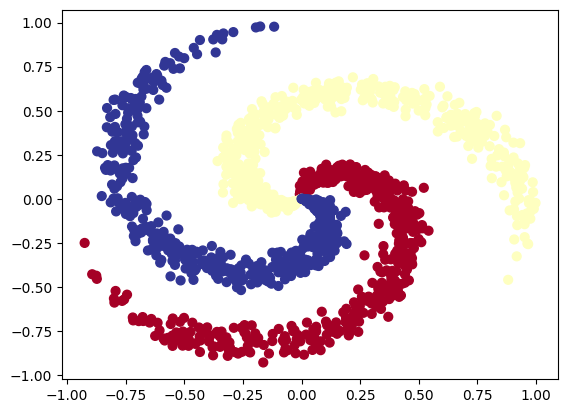

In [151]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 500 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [152]:
# Turn data into a DataFrame
import pandas as pd
df = pd.DataFrame({"X1": X[:, 0],
                   'X2': X[:, 1],
                   'y': y})
df.head()

,X1,X2,y
0,0.000000,0.000000,0
1,-0.000039,0.002004,0
2,0.000581,0.003966,0
3,0.001940,0.005690,0
4,-0.000118,0.008015,0


In [153]:
# Split data into train and valid sets
from sklearn.model_selection import train_test_split
df_train, df_valid = train_test_split(df, test_size=0.2)

In [154]:
import torch
from torch.utils.data import Dataset, DataLoader

class SpiralDS(Dataset):
    def __init__(self, df):
        self.df = df
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        X = torch.tensor(df[['X1','X2']].iloc[idx], dtype=torch.float)
        y = torch.tensor(df['y'].iloc[idx], dtype=torch.long)
        return X, y

train_ds = SpiralDS(df_train)
valid_ds = SpiralDS(df_valid)

train_dl = DataLoader(dataset=train_ds,
                      batch_size=32,
                      shuffle=True,
                      drop_last=True)

valid_dl = DataLoader(dataset=valid_ds,
                      batch_size=32,
                      shuffle=True,
                      drop_last=True)

In [155]:
batch = next(iter(train_dl))
batch

[tensor([[ 0.2581,  0.1100],
         [ 0.4650, -0.3104],
         [ 0.1697,  0.4969],
         [-0.2194,  0.0368],
         [ 0.7930,  0.3809],
         [-0.2832,  0.2837],
         [ 0.2717,  0.6466],
         [-0.3210,  0.1361],
         [-0.1058, -0.0228],
         [ 0.0333,  0.0966],
         [-0.1950,  0.4789],
         [ 0.9191,  0.1412],
         [ 0.1220, -0.0080],
         [-0.0953,  0.5061],
         [-0.2241,  0.0537],
         [ 0.0553,  0.0907],
         [-0.2849,  0.1940],
         [ 0.0259, -0.0029],
         [ 0.2437, -0.6126],
         [-0.2199,  0.4390],
         [ 0.3156,  0.1283],
         [ 0.9040,  0.2345],
         [ 0.3173, -0.6120],
         [ 0.0335, -0.0063],
         [-0.2227,  0.3571],
         [-0.2922,  0.2183],
         [ 0.0620, -0.0038],
         [ 0.0029,  0.0137],
         [ 0.1210, -0.1843],
         [-0.1098, -0.0737],
         [ 0.7274,  0.4469],
         [-0.1946,  0.0478]]),
 tensor([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0

Note that our Blob model will fail to classify for the Spiral dataset because the data are not linearly seperable. In order to improve our model, we will need to add non-linearity within the layers

In [156]:
from torch import nn

class SpiralModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=10):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, X):
        return self.linear_layer_stack(X)

model_4 = SpiralModel(input_features=2,
                      output_features=3,
                      hidden_units=10)

In [157]:
model_4_learner = SSTLearner(model=model_4,
                             loss_fn=loss_fn,
                             metric_fn=metric_fn,
                             optimizer=torch.optim.SGD(params=model_4.parameters(), lr=0.1),
                             train_dataloader=train_dl,
                             valid_dataloader=valid_dl)

In [169]:
model_4_learner.model.to('cuda')

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [170]:
model_4_learner.train(10)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 143 | LR: 1.0E-01 | train_loss: 0.047 | valid_loss: 0.078 
train_metric: {'accuracy': 0.985, 'precision': 0.98, 'recall': 0.981, 'f1': 0.979}
valid_metric: {'accuracy': 0.972, 'precision': 0.778, 'recall': 0.986, 'f1': 0.771}
----------------------------------------------------------------------------------------------------
Epoch: 144 | LR: 1.0E-01 | train_loss: 0.043 | valid_loss: 0.127 
train_metric: {'accuracy': 0.989, 'precision': 0.987, 'recall': 0.988, 'f1': 0.986}
valid_metric: {'accuracy': 0.944, 'precision': 0.556, 'recall': 0.972, 'f1': 0.541}
----------------------------------------------------------------------------------------------------
Epoch: 145 | LR: 1.0E-01 | train_loss: 0.062 | valid_loss: 0.055 
train_metric: {'accuracy': 0.984, 'precision': 0.98, 'recall': 0.974, 'f1': 0.973}
valid_metric: {'accuracy': 0.993, 'precision': 0.889, 'recall': 0.997, 'f1': 0.887}
--------------------------------------------------------------------------------------------------